In [1]:
# Networkx drawing sample

In [2]:
# Import modules

import networkx as nx

import matplotlib
import matplotlib.pyplot as plt

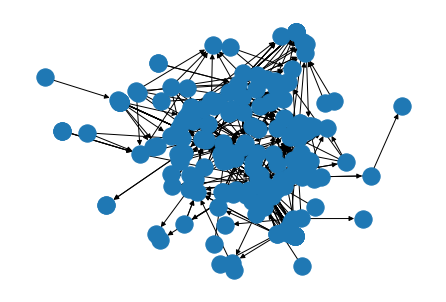

In [3]:
# Generate a scale free graph

# Parameters for scale_free_graph
alpha = 0.4
beta  = 0.4
gamma = 1.0 - (alpha+beta)

g = nx.scale_free_graph(
    200,
    alpha=alpha,
    beta=beta,
    gamma=gamma
)

in_degrees = [g.in_degree(n) for n in g.nodes]

nx.draw_kamada_kawai(g)

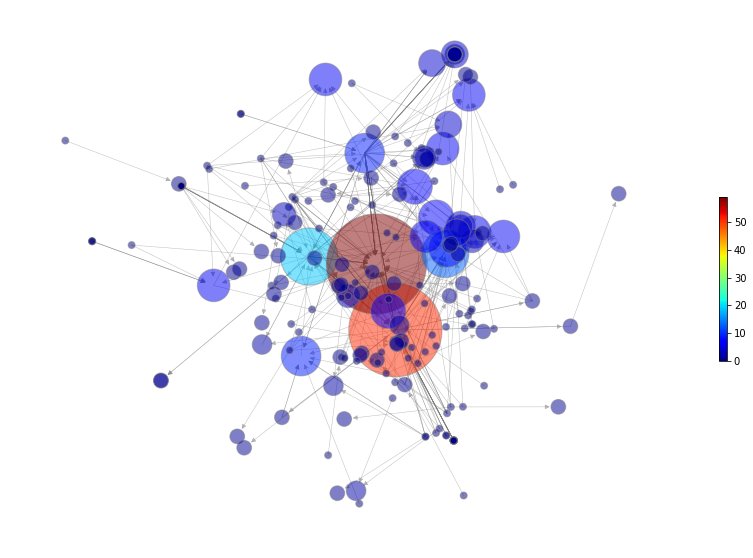

In [4]:
# Layout graph
pos = nx.kamada_kawai_layout(g)

# Configure matplotlib

# Figure size and layout
plt.figure(figsize=(15, 10))
plt.tight_layout()

# Splines
for p in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[p].set_visible(False)

# Colorbar
sm = plt.cm.ScalarMappable(
    cmap=plt.cm.jet,
    norm=plt.Normalize(
        vmin=min(in_degrees),
        vmax=max(in_degrees)
    )
)
plt.colorbar(sm, shrink=0.3)

# Draw nodes
nx.draw_networkx_nodes(
    g,
    pos,
    node_size=[(d/max(in_degrees))*100**2+50 for d in in_degrees],
    node_color=in_degrees,
    cmap=plt.cm.jet,
    vmin=min(in_degrees),
    vmax=max(in_degrees),
    linewidths=1,
    edgecolors='gray',
    alpha=0.5
)

# Draw edges
nx.draw_networkx_edges(
    g,
    pos,
    width=0.5,
    edge_color='gray',
    alpha=0.5,
)

plt.show()